using the following dataset:
https://www.kaggle.com/datasets/mryanm/luflow-network-intrusion-detection-data-set
<br>Interpretations done during oral presentation</br>

-----

# Imports

In [1]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import os
#import threading not useful > process could have been used

#processing
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.neighbors as skn
import sklearn.model_selection as skms
from sklearn.neural_network import MLPClassifier

#interpretation
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

In [ ]:
dirname = os.path.abspath("")
filename = os.path.join(dirname, 'archive\\2022\\06\\2022.06.13\\2022.06.13.csv')
print(filename)

In [3]:
data = pd.read_csv(filename)

----
# Data analysis

In [24]:
print(data.shape)

(452123, 16)


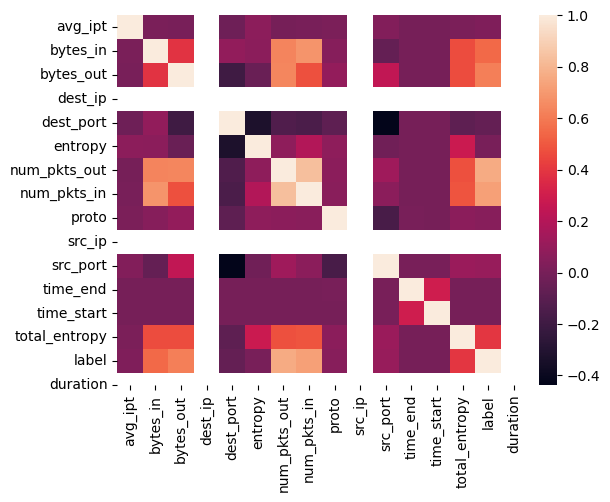

In [8]:
sns.heatmap(data.corr(),xticklabels=data.columns,yticklabels=data.columns);

In [18]:
analyzed = data.groupby(by="dest_ip").count()
analyzed.head(10)

,avg_ipt,bytes_in,bytes_out,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
dest_ip,,,,,,,,,,,,,,,
786,452123,452123,452123,403833,452123,452123,452123,452123,452123,403833,452123,452123,452123,452123,452123


In [26]:
analyzed = data.groupby(by="src_ip").count()
analyzed.head(10)

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_port,time_end,time_start,total_entropy,label,duration
src_ip,,,,,,,,,,,,,,,
786,452123,452123,452123,452123,403833,452123,452123,452123,452123,403833,452123,452123,452123,452123,452123


dest_port
9200.0     163998
5900.0      53342
445.0       28591
22.0        10366
9300.0       6695
47613.0      6230
45324.0      5832
45332.0      5708
45322.0      5700
45330.0      5665
Name: label, dtype: int64

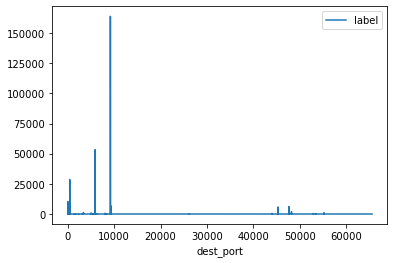

In [42]:
data.groupby(by="dest_port").count()["label"].plot(legend=True)
analyzed = data.groupby(by="dest_port").count()
analyzed.sort_values(by="label",inplace=True,ascending=False)
analyzed["label"].head(10)

In [45]:
analyzed = data.groupby(by="src_port").count()
analyzed.sort_values(by="label",inplace=True,ascending=False)
analyzed["label"].head(10)

src_port
47613.0    48773
9200.0     45420
45318.0    19575
45332.0    19391
45330.0    19378
45322.0    18543
45334.0    18327
45324.0    17851
45326.0    13035
45328.0    12844
Name: label, dtype: int64

In [13]:
#destination port of malicious and outlier data
analyzed = data[(data.label == 'malicious') | (data.label == 'outlier')].groupby(by="dest_port").count()
analyzed.sort_values(by="label",inplace=True,ascending=False)
analyzed["label"].head(10)

dest_port
5900.0     53342
445.0      28591
22.0       10352
47613.0     6230
80.0        3053
123.0       2416
23.0        2062
3389.0      1231
55179.0     1067
5060.0       902
Name: label, dtype: int64

##### dest_ip, src_ip are useless, src_port, dest_port, time_end and time_start as well

--------
# KNN

In [34]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(axis=0,inplace=True,how="any")

In [35]:
X = data

In [36]:
Y = data["label"]

In [37]:
del X["label"]
del X["time_end"]
del X["time_start"]

In [38]:
del X["dest_ip"]
del X["src_port"]
del X["src_ip"]
del X["dest_port"]

In [40]:
X.head(10)

,avg_ipt,bytes_in,bytes_out,entropy,num_pkts_out,num_pkts_in,proto,total_entropy,duration
0,0.000000,0,0,0.000000,1,0,6,0.00,0.000000
5,0.000000,0,0,0.000000,1,0,6,0.00,0.000000
6,167.709091,1680,3028,8.974504,58,21,6,42251.97,9.233032
8,0.000000,0,0,0.000000,1,0,6,0.00,0.000000
10,412.791667,7306,59008,1.204369,74,42,6,79866.50,31.382310
11,303.324675,8971,57618,1.169541,77,46,6,77878.58,23.383620
12,0.000000,0,0,0.000000,2,1,6,0.00,0.020813
13,0.000000,0,0,0.000000,1,0,6,0.00,0.000000
14,0.000000,0,0,0.000000,1,0,6,0.00,0.000000
15,0.000000,0,0,0.000000,1,0,6,0.00,0.000000


In [41]:
X_val = X.values
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X_val))

In [42]:
X_scaled.head(10)

,0,1,2,3,4,5,6,7,8
0,0.000000e+00,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.000000
1,0.000000e+00,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.000000
2,3.904782e-08,0.025743,0.046204,0.118743,0.227451,0.082677,0.0,0.011621,0.225066
3,0.000000e+00,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.000000
4,9.611055e-08,0.111952,0.900404,0.015935,0.290196,0.165354,0.0,0.021966,0.764982
5,7.062328e-08,0.137466,0.879194,0.015474,0.301961,0.181102,0.0,0.021419,0.570004
6,0.000000e+00,0.000000,0.000000,0.000000,0.007843,0.003937,0.0,0.000000,0.000507
7,0.000000e+00,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.000000
8,0.000000e+00,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.000000
9,0.000000e+00,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.000000


In [24]:
x_train,x_test,y_train,y_test = skms.train_test_split(X_scaled,Y,test_size=0.2,random_state=30)

In [ ]:
#### Multi processinga tester

results=[]

def knnmodel(k,x_train,y_train):
    model = skn.KNeighborsClassifier(k).fit(x_train, y_train)
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_predict,y_test)
    results.append((k,round(accuracy,4)))
    print(k,accuracy)
    

for k in range (1,15):
    #stocker les process, tous les starts, les join (dans une autre boucle)
    #regarder timeouts (parametres join)
    t = threading.Thread(target=knnmodel, args=(k,x_train,y_train))
    t.run()

In [57]:
results=[]
for k in range (1,15):
    model = skn.KNeighborsClassifier(k).fit(x_train, y_train)
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_predict,y_test)
    results.append((k,round(accuracy,4)))
    print(k,accuracy)

1 0.958856958906484
2 0.9628932608614904
3 0.9645894981861404
4 0.963561850755878
5 0.9644780665370758
6 0.9636732824049427
7 0.964143771589882
8 0.9635247068728565
9 0.9641685341785631
10 0.9633637500464298
11 0.9637475701709857
12 0.9632275558086842
13 0.9633018435747273
14 0.9628437356841284


K is 1 with accuracy 0.9589
K is 2 with accuracy 0.9629
K is 3 with accuracy 0.9646
K is 4 with accuracy 0.9636
K is 5 with accuracy 0.9645
K is 6 with accuracy 0.9637
K is 7 with accuracy 0.9641
K is 8 with accuracy 0.9635
K is 9 with accuracy 0.9642
K is 10 with accuracy 0.9634
K is 11 with accuracy 0.9637
K is 12 with accuracy 0.9632
K is 13 with accuracy 0.9633
K is 14 with accuracy 0.9628


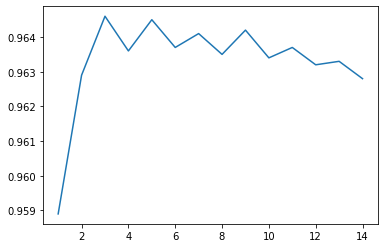

In [58]:
x=[]
y=[]
for result in results:
    print(f"K is {result[0]} with accuracy {result[1]}")
    x.append(result[0])
    y.append(result[1])
plt.plot(x,y);

In [35]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
model = skn.KNeighborsClassifier(3).fit(x_train, y_train)
y_predict = model.predict(x_test)

In [44]:
print('Accuracy=',accuracy_score(y_predict,y_test))

Accuracy= 0.9644037787710327


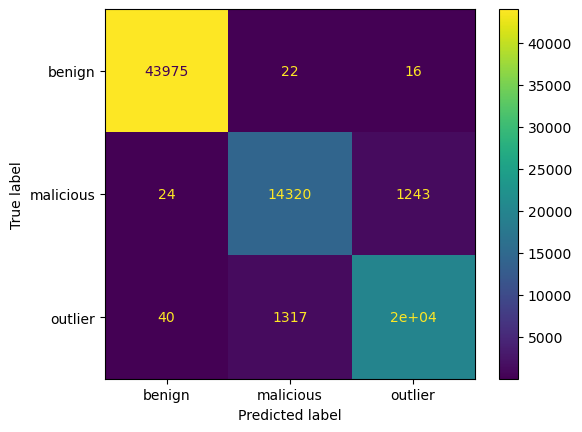

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
plt.show()

# XGBOOST

In [10]:
data = pd.read_csv(filename)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(axis=0,inplace=True,how="any")

In [11]:
X = data

In [12]:
Y = data["label"]

In [13]:
del X["label"]
del X["time_end"]
del X["time_start"]

In [14]:
del X["dest_ip"]
del X["src_port"]
del X["src_ip"]
del X["dest_port"]

In [15]:
X_val = X.values
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X_val))
x_train,x_test,y_train,y_test = skms.train_test_split(X_scaled,Y,test_size=0.2,random_state=30)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [16]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
print(model.feature_importances_)

[0.03242287 0.04084029 0.11028596 0.03313777 0.04018992 0.12741713
 0.10247683 0.37868154 0.13454765]


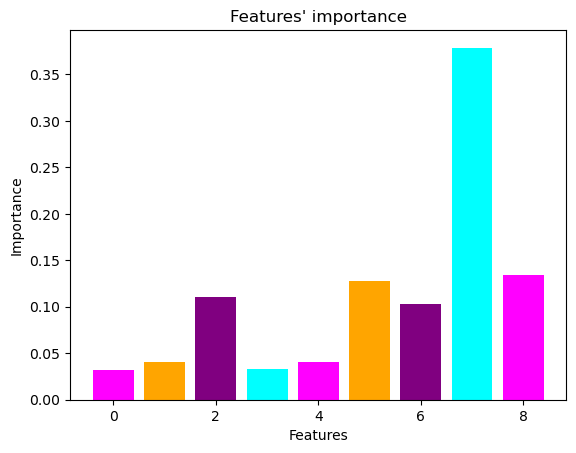

In [21]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_,
        color=['magenta', 'orange', 'purple', 'cyan'])
plt.title("Features' importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show;

##### We see that entropy plays a huge role in XGBoost's results

In [31]:
y_predict = model.predict(x_test)
y_test = label_encoder.fit_transform(y_test)
print('Accuracy=',accuracy_score(y_predict,y_test))

Accuracy= 0.8866244877239466


# MLP

In [4]:
data = pd.read_csv(filename)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(axis=0,inplace=True,how="any")
X = data
Y = data["label"]
del X["label"]
del X["time_end"]
del X["time_start"]
del X["dest_ip"]
del X["src_port"]
del X["src_ip"]
del X["dest_port"]

In [5]:
X_val = X.values
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X_val))
x_train,x_test,y_train,y_test = skms.train_test_split(X_scaled,Y,test_size=0.2,random_state=30)

In [ ]:
clf = MLPClassifier(max_iter=100, verbose=True,learning_rate="invscaling")
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print('Accuracy=',accuracy_score(y_predict,y_test))